In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("salaries.csv")

In [3]:
data.shape

(16, 4)

In [4]:
data.columns

Index(['company', 'job', 'degree', 'salary_more_then_100k'], dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
company                  16 non-null object
job                      16 non-null object
degree                   16 non-null object
salary_more_then_100k    16 non-null int64
dtypes: int64(1), object(3)
memory usage: 592.0+ bytes


In [6]:
data.describe()

,salary_more_then_100k
count,16.000
mean,0.625
std,0.500
min,0.000
25%,0.000
50%,1.000
75%,1.000
max,1.000


In [7]:
A = data.dtypes == "object"

In [8]:
data.describe(include = ["object"])

,company,job,degree
count,16,16,16
unique,3,3,2
top,facebook,business manager,bachelors
freq,6,6,8


In [9]:
data.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [10]:
x = data.drop("salary_more_then_100k",axis = 1)

In [11]:
x

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [12]:
y = data["salary_more_then_100k"]
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [13]:
# isme onehotencoder ki need nahi rahti h
from sklearn.preprocessing import LabelEncoder
com_le = LabelEncoder()
job_le = LabelEncoder()
deg_le = LabelEncoder()

In [14]:
data["company"] = com_le.fit_transform(data["company"])
data["job"] = job_le.fit_transform(data["job"])
data["degree"] = deg_le.fit_transform(data["degree"])


In [15]:
data.head()

,company,job,degree,salary_more_then_100k
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0


In [16]:
x = data.drop("salary_more_then_100k",axis = 1)

In [17]:
y = data["salary_more_then_100k"]

In [18]:
x

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [19]:
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [20]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
model.predict([[2,1,0]])

array([0], dtype=int64)

In [22]:
y = y.values

In [23]:
y = y.reshape(-1,1)
y.ndim

2

In [24]:
y_pred = model.predict(x)

In [25]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y,y_pred)
con_mat

array([[ 6,  0],
       [ 0, 10]], dtype=int64)

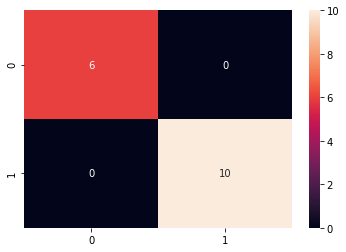

In [26]:
sns.heatmap(con_mat,annot = True)

In [27]:
model.score(x,y)

1.0